In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import numpy as np
import mediapipe as mp
import os
import shutil
import matplotlib.pyplot as plt
import mediapipe as mp
 
mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates
 
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 35.7 MB/s eta 0:00:00


In [ ]:
base_dir = '/content/drive/MyDrive/bakalavr'
dataset_dir = f'{base_dir}/dataset'
utility_dir = f'{base_dir}/utility'

In [ ]:
import os
import time
def get_faces(direc=f"{dataset_dir}/landmarks/"):
    faces=[]
    IMG_SIZE = 145
    categories = ["Fatigue", "Active"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            faces.append([resized_array, class_num1])
    return faces
faces = get_faces()

0


In [ ]:
X = []
y = []
for feature, label in yawn_no_yawn:
    X.append(feature)
    y.append(label)

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.19
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

In [ ]:
len(X_train)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
# Model Elsafty 1
from keras.layers import BatchNormalization
model = tf.keras.models.Sequential()

model.add(Conv2D(16, 3, activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.1))

model.add(Conv2D(32, 5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.1))

model.add(Conv2D(64, 10, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.1))

model.add(Conv2D(128, 12, activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 143, 143, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 32)        12832     
                                                                 
 batch_normalization_1 (Batc  (None, 67, 67, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
history = model.fit(train_generator, epochs=70, validation_data=test_generator)

Epoch 1/70
184/184 [==============================] - 48s 174ms/step - loss: 0.5127 - accuracy: 0.7393 - val_loss: 0.9729 - val_accuracy: 0.5228
Epoch 2/70
184/184 [==============================] - 30s 162ms/step - loss: 0.4492 - accuracy: 0.7703 - val_loss: 1.9870 - val_accuracy: 0.5194
Epoch 3/70
184/184 [==============================] - 30s 165ms/step - loss: 0.3883 - accuracy: 0.8049 - val_loss: 0.7775 - val_accuracy: 0.6292
Epoch 4/70
184/184 [==============================] - 30s 162ms/step - loss: 0.3232 - accuracy: 0.8561 - val_loss: 0.3560 - val_accuracy: 0.8487
Epoch 5/70
184/184 [==============================] - 30s 161ms/step - loss: 0.2728 - accuracy: 0.8853 - val_loss: 1.2598 - val_accuracy: 0.5446
Epoch 6/70
184/184 [==============================] - 30s 164ms/step - loss: 0.2576 - accuracy: 0.8917 - val_loss: 0.7404 - val_accuracy: 0.6905
Epoch 7/70
184/184 [==============================] - 30s 162ms/step - loss: 0.2521 - accuracy: 0.8948 - val_loss: 0.5225 - val_ac

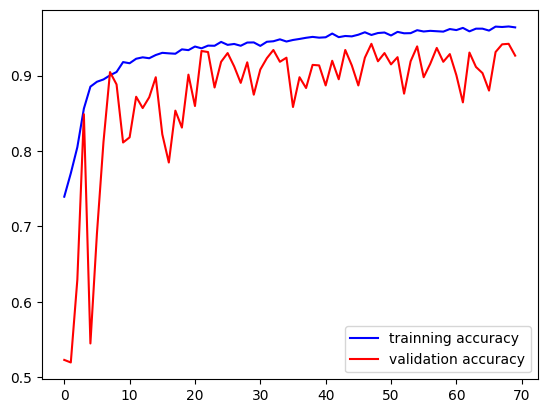

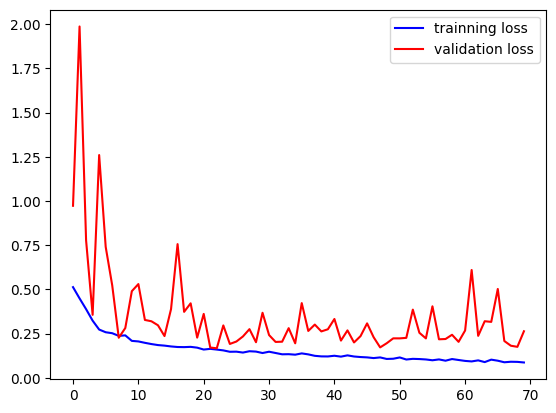

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:

result = model.evaluate(test_generator)
dict(zip(model.metrics_names, result))

Evaluate
46/46 [==============================] - 8s 18ms/step - loss: 0.2632 - accuracy: 0.9264


{'loss': 0.2632160186767578, 'accuracy': 0.9263803958892822}

In [ ]:
#model.save(f'{base_dir}/model.h5')
model = tf.keras.models.load_model(f'{base_dir}/model.h5')

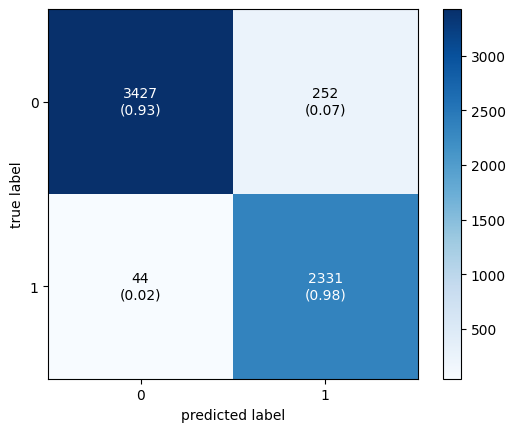

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
binary1 = np.array([[3427,252],[44,2331]])
fig, ax = plot_confusion_matrix(conf_mat=binary1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

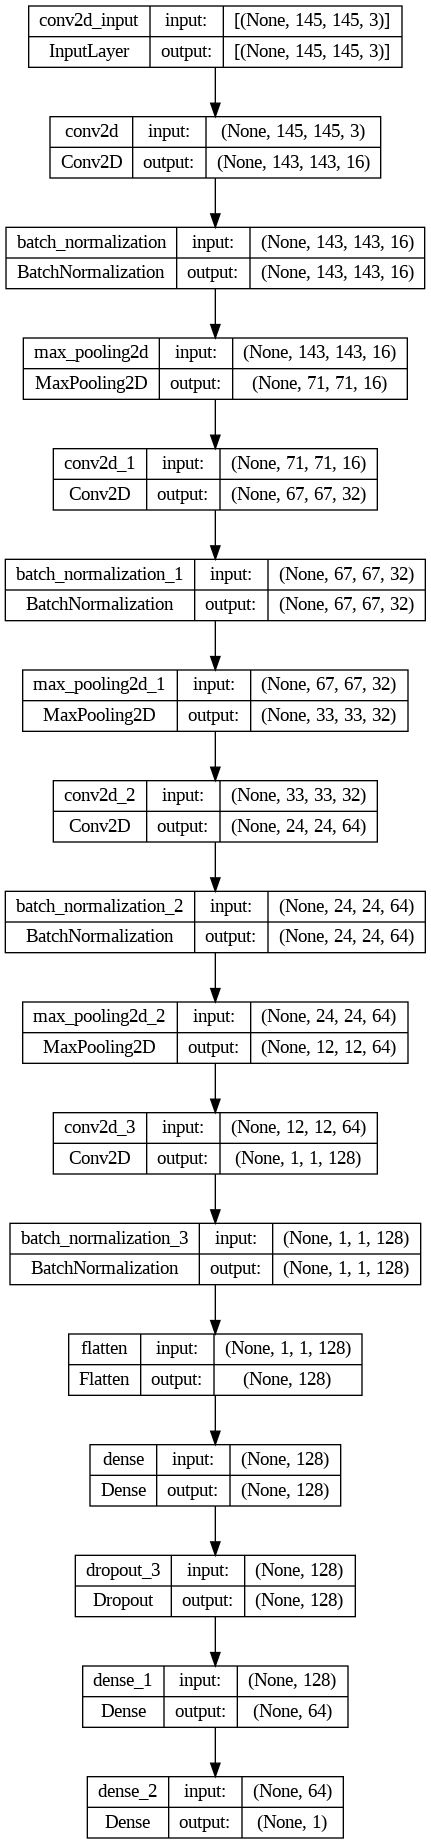

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 5.8 MB/s eta 0:00:00


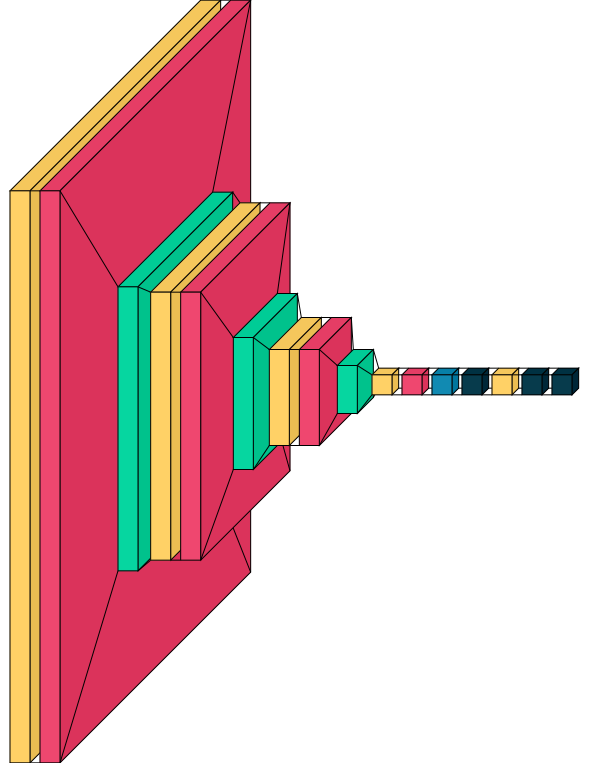

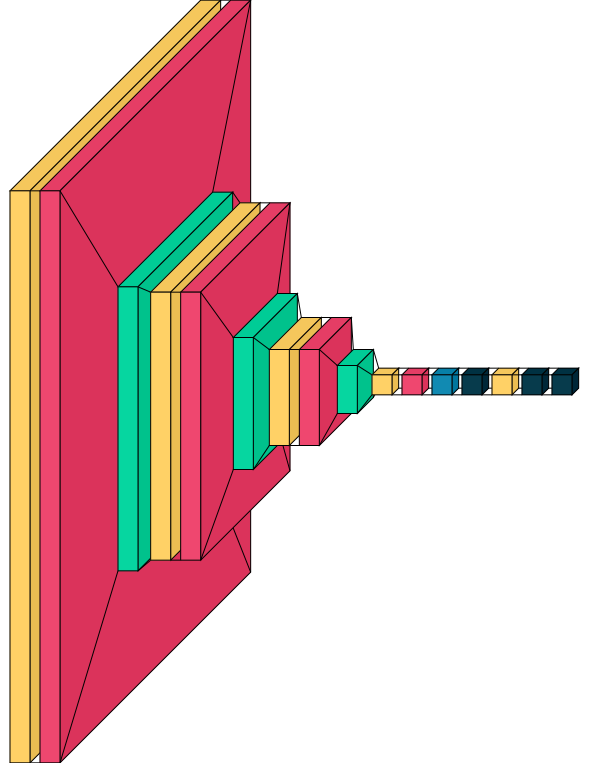

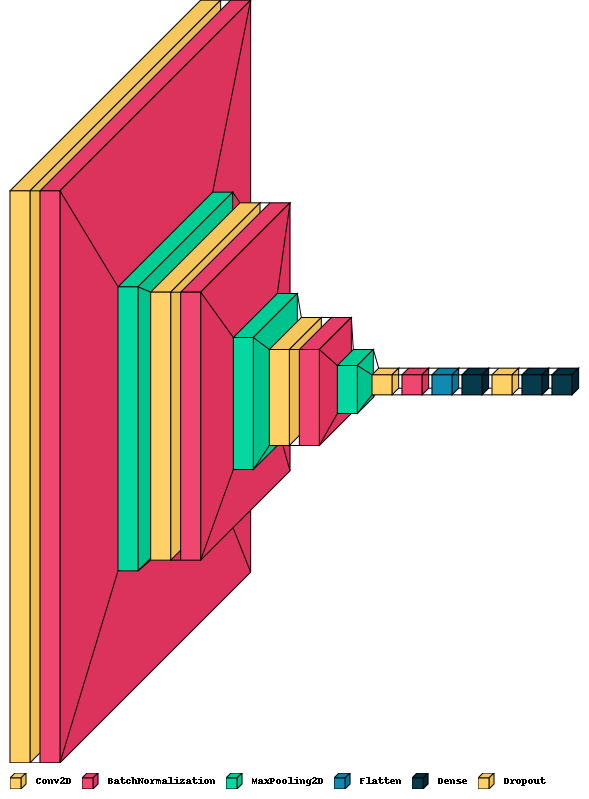

In [ ]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model,legend=True)